In [1]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#맷플랏립 그래프 주피터에서 바로 출력하기
import seaborn as sns

from scipy import stats
from scipy.stats import t, norm, chi2, chi2_contingency
import re
import time

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

from sklearn.datasets import load_iris
from sklearn import datasets

import cx_Oracle

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

from sklearn import tree
from sklearn.datasets import make_classification

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

import xgboost    #1.7.5버전
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer

from hyperopt import hp
from hyperopt import fmin, tpe, Trials
from hyperopt import STATUS_OK

In [2]:
pip install hyperopt


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# df = pd.read_csv(r'D:\hmkd1\m1_programming\프젝 sql\DEMO15_최종.csv')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 사용하고자 하는 한글 폰트 경로 지정
font_prop = fm.FontProperties(fname=font_path)
matplotlib.rc('font', family=font_prop.get_name())

In [4]:
import pandas as pd
df = pd.read_excel('demo15_최종.xlsx')

In [5]:
df.fillna(0, inplace=True) # 널값을 모두 0 으로

In [6]:
df_encoded = pd.get_dummies(df[['연령대', '거주지역']])
df = pd.concat([df, df_encoded], axis=1)


In [7]:
# 이분활인것은 요런식으로~
#성별 F가 더 더 벌어주니까 1로 만들어놈, 멤버십 X 도 같은거

df['성별'] = df['성별'].apply(lambda x: 1 if x == 'F' else 0)
df['멤버십'] = df['멤버십'].apply(lambda x: 1 if x == 'X' else 0)
df['고객유형'] = df['고객유형'].apply(lambda x: 1 if x == '충성고객' else 0)


In [9]:
df.columns[40:70]

Index(['주말비율26', '주말비율37', '주말비율6', '주말비율7', '주말비율8', '심야비율_15', '오전비율_15',
       '오후비율_15', '저녁비율_15', '새벽비율_15', '심야비율_26', '오전비율_26', '오후비율_26',
       '저녁비율_26', '새벽비율_26', '심야비율_37', '오전비율_37', '오후비율_37', '저녁비율_37',
       '새벽비율_37', '심야비율_6', '오전비율_6', '오후비율_6', '저녁비율_6', '새벽비율_6', '심야비율_7',
       '오전비율_7', '오후비율_7', '저녁비율_7', '새벽비율_7'],
      dtype='object')

In [10]:
df['주말비율6']

0        0.31
1        0.31
2        0.11
3        0.26
4        0.45
         ... 
19378    0.33
19379    0.71
19380    0.26
19381    0.26
19382    0.33
Name: 주말비율6, Length: 19383, dtype: float64

In [11]:
df['주말비율7']

0        0.29
1        0.19
2        0.26
3        0.23
4        0.00
         ... 
19378    0.32
19379    0.58
19380    0.29
19381    0.28
19382    0.34
Name: 주말비율7, Length: 19383, dtype: float64

In [9]:
df = df.drop(columns=['연령대', '거주지역'])

In [10]:
df['남성_학생층'] = (df['연령대_학생층'] == 1) & (df['성별'] == 0)
df['여성_학생층'] = (df['연령대_학생층'] == 1) & (df['성별'] == 1)
df['남성_청년층'] = (df['연령대_청년층'] == 1) & (df['성별'] == 0)
df['여성_청년층'] = (df['연령대_청년층'] == 1) & (df['성별'] == 1)

df['남성_중년층'] = (df['연령대_중년층'] == 1) & (df['성별'] == 0)
df['여성_중년층'] = (df['연령대_중년층'] == 1) & (df['성별'] == 1)
df['남성_노년층'] = (df['연령대_노년층'] == 1) & (df['성별'] == 0)
df['여성_노년층'] = (df['연령대_노년층'] == 1) & (df['성별'] == 1)

#해당되면 1 해당되지않으면 0 
df = df['남성_학생층'].astype(int)
df = df['여성_학생층'].astype(int)
df = df['남성_청년층'].astype(int)
df = df['여성_청생층'].astype(int)
df = df['남성_중년층'].astype(int)
df = df['여성_중년층'].astype(int)
df = df['남성_노년층'].astype(int)
df = df['여성_노생층'].astype(int)

In [43]:
# 왜곡 정도가 심한 것 중 피처중요도가 높은 것 -> 로그변환
from scipy.stats import skew
column =['경쟁사횟수','총구매금액','계절총액_15','월평균액_6','월평균액_7','월평균액_8','계절총액_26','계절총액_37','계절총액_48','월평균액_15','월평균액_26','평균구매품목수6','평균구매품목수7','평균구매품목수8', '월평균액_37','평균구매품목수15','평균구매품목수26','평균구매품목수37','총방문횟수15','총방문횟수26','총방문횟수37','총방문횟수48']
skew_list = df[column].apply(lambda x: skew(x))
skew_list.sort_values(ascending=False)

월평균액_8       32.666507
월평균액_6       27.247061
월평균액_7       26.492022
월평균액_15      20.711374
월평균액_37      20.365979
월평균액_26      19.268723
계절총액_26      19.268723
총구매금액         9.540027
계절총액_15       6.040200
계절총액_37       4.153855
경쟁사횟수         3.846571
평균구매품목수15     1.846127
평균구매품목수8      1.720662
평균구매품목수6      1.580004
평균구매품목수7      1.568885
평균구매품목수26     1.367732
평균구매품목수37     1.351381
총방문횟수48       0.645341
총방문횟수37       0.577547
총방문횟수26       0.531417
총방문횟수15       0.514767
계절총액_48      -4.007667
dtype: float64

In [14]:
df2 = df[['멤버십', '고객유형', '경쟁사횟수', 
       'target_15','계절총액_15', '등급_15',  '평균구매품목수15', '총방문횟수15','오전비율_15','주말비율15' 
        '오후비율_15', '저녁비율_15', '새벽비율_15','0_누적_15', '0_절대_15','1_누적_15', '1_절대_15','2_누적_15', '2_절대_15',
        '3_누적_15', '3_절대_15','4_누적_15', '4_절대_15','5_누적_15', '5_절대_15','6_누적_15', '6_절대_15',
        '7_누적_15', '7_절대_15','8_누적_15', '8_절대_15','9_누적_15', '9_절대_15','10_누적_15', '10_절대_15',
        '11_누적_15', '11_절대_15','12_누적_15', '12_절대_15','13_누적_15', '13_절대_15',
         '거주지역_0', '거주지역_강원', '거주지역_경남', '거주지역_경북',
       '거주지역_광주', '거주지역_대구', '거주지역_대전', '거주지역_부산','거주지역_서울', '거주지역_세종', '거주지역_수도권', '거주지역_울산',
       '거주지역_전남', '거주지역_전북', '거주지역_제주', '거주지역_충남', '거주지역_충북','남성_학생층', '여성_학생층',
       '남성_청년층', '여성_청년층', '남성_중년층', '여성_중년층', '남성_노년층', '여성_노년층']].copy()


In [ ]:
'주말비율15', '주말비율26', '주말비율37', '주말비율6', '주말비율7', '주말비율8',
       '심야비율_15', '오전비율_15', '오후비율_15', '저녁비율_15', '새벽비율_15', '심야비율_26',
       '오전비율_26'],

In [15]:
df3= df[['target_26']].copy()

In [13]:
df['저녁비율_6']

0        0.22
1        0.20
2        0.04
3        0.15
4        0.15
         ... 
19378    0.29
19379    0.58
19380    0.59
19381    0.53
19382    0.00
Name: 저녁비율_6, Length: 19383, dtype: float64

In [16]:
df4 = df[['멤버십', '고객유형', '경쟁사횟수', 
       'target_26','계절총액_26', '등급_6',  '평균구매품목수6', '총방문횟수26','오전비율_26', '주말비율6'
        '오후비율_26', '저녁비율_6', '새벽비율_26','0_누적_26', '0_절대_26','1_누적_26', '1_절대_26','2_누적_26', '2_절대_26',
        '3_누적_26', '3_절대_26','4_누적_26', '4_절대_26','5_누적_26', '5_절대_26','6_누적_26', '6_절대_26',
        '7_누적_26', '7_절대_26','8_누적_26', '8_절대_26','9_누적_26', '9_절대_26','10_누적_26', '10_절대_26',
        '11_누적_26', '11_절대_26','12_누적_26', '12_절대_26','13_누적_26', '13_절대_26','거주지역_0', '거주지역_강원', '거주지역_경남', '거주지역_경북',
       '거주지역_광주', '거주지역_대구', '거주지역_대전', '거주지역_부산','거주지역_서울', '거주지역_세종', '거주지역_수도권', '거주지역_울산',
       '거주지역_전남', '거주지역_전북', '거주지역_제주', '거주지역_충남', '거주지역_충북','남성_학생층', '여성_학생층',
       '남성_청년층', '여성_청년층', '남성_중년층', '여성_중년층', '남성_노년층', '여성_노년층']].copy()

In [17]:
df5= df[['target_37']].copy()

In [18]:
df6 = df[['멤버십', '고객유형', '경쟁사횟수', 
       'target_37','계절총액_37', '등급_37', '평균구매품목수37', '총방문횟수37','오전비율_37', 
        '오후비율_37', '저녁비율_37', '새벽비율_37','0_누적_37', '0_절대_37','1_누적_37', '1_절대_37','2_누적_37', '2_절대_37',
        '3_누적_37', '3_절대_37','4_누적_37', '4_절대_37','5_누적_37', '5_절대_37','6_누적_37', '6_절대_37',
        '7_누적_37', '7_절대_37','8_누적_37', '8_절대_37','9_누적_37', '9_절대_37','10_누적_37', '10_절대_37',
        '11_누적_37', '11_절대_37','12_누적_37', '12_절대_37','13_누적_37', '13_절대_37','거주지역_0', '거주지역_강원', '거주지역_경남', '거주지역_경북',
       '거주지역_광주', '거주지역_대구', '거주지역_대전', '거주지역_부산','거주지역_서울', '거주지역_세종', '거주지역_수도권', '거주지역_울산',
       '거주지역_전남', '거주지역_전북', '거주지역_제주', '거주지역_충남', '거주지역_충북','남성_학생층', '여성_학생층',
       '남성_청년층', '여성_청년층', '남성_중년층', '여성_중년층', '남성_노년층', '여성_노년층']].copy()

In [19]:
df7= df[['target_48']].copy()

In [20]:
dataset =  df2.copy() # 1-5분기 
dataset2 = df3.copy() # 6분기
dataset3 = df4.copy() # 2-6분기
dataset4 = df5.copy() # 7분기

In [22]:
dataset5 = df6.copy() # 3-7분기
dataset6 = df7.copy() # 8분기

In [21]:
X_train = dataset

y_train = dataset2

X_validation = dataset3

y_validation = dataset4

In [23]:
X_test = dataset5

y_test = dataset6

<Axes: >

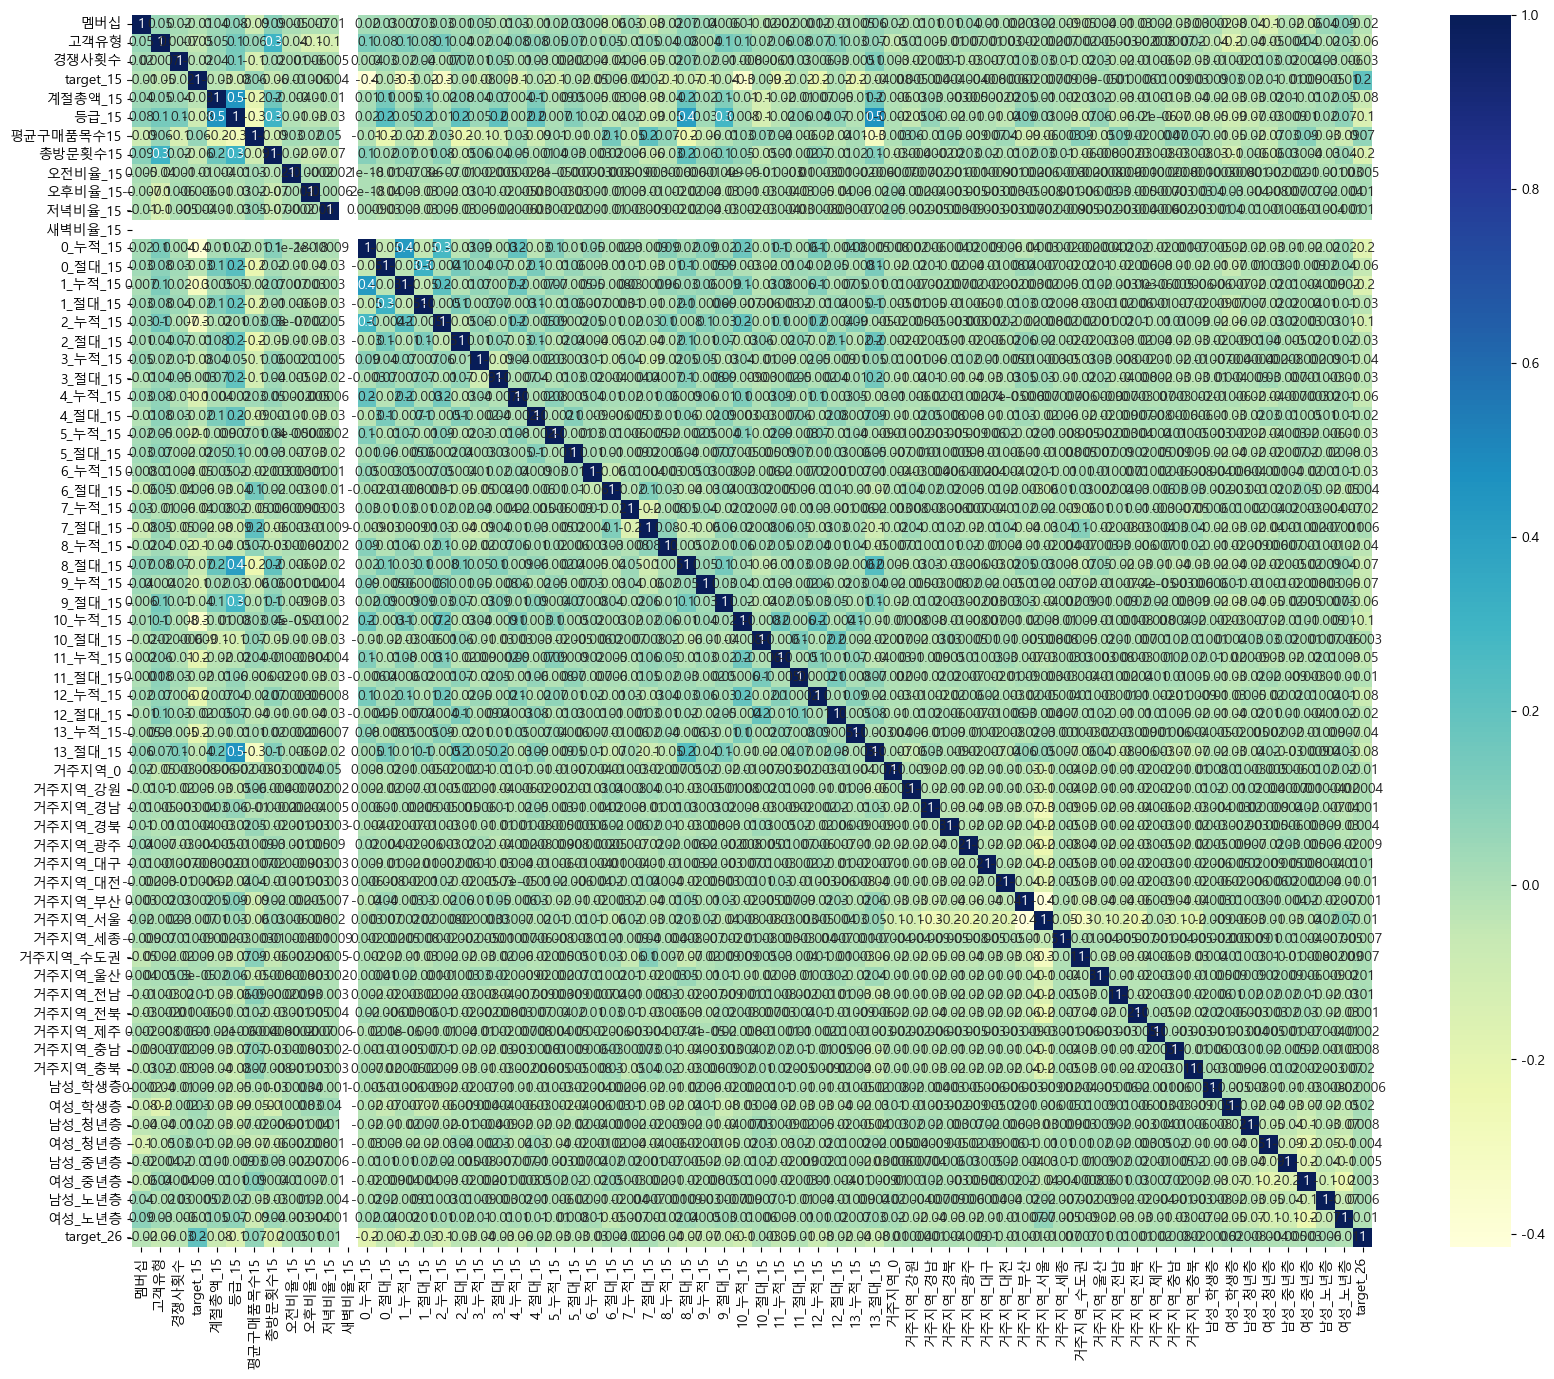

In [25]:
combined_df = pd.concat([df2, df3['target_26']], axis=1)
corr_matrix = combined_df.corr()

plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix , annot=True, fmt='.1g', cmap='YlGnBu')
# corr.TARGET_15.sort_values(ascending=True)

In [30]:
dtree = DecisionTreeClassifier(random_state=100)
params = {'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 3, 4]}
gdt = GridSearchCV(dtree, param_grid=params, scoring='accuracy', n_jobs=-1)
gdt.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=100), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [31]:
print('GridSearchCV 최적 파라미터:', gdt.best_params_)
print('GridSearchCV 최고 정확도:', gdt.best_score_)

GridSearchCV 최적 파라미터: {'max_depth': 4, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.6649646122923871


In [32]:
scores_df = pd.DataFrame(gdt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 3, 'min_samples_split': 2}",0.662179,7,0.648182,0.656435,0.667526
1,"{'max_depth': 3, 'min_samples_split': 3}",0.662179,7,0.648182,0.656435,0.667526
2,"{'max_depth': 3, 'min_samples_split': 4}",0.662179,7,0.648182,0.656435,0.667526
3,"{'max_depth': 4, 'min_samples_split': 2}",0.664965,1,0.648182,0.663142,0.674491
4,"{'max_depth': 4, 'min_samples_split': 3}",0.664965,1,0.648182,0.663142,0.674491
5,"{'max_depth': 4, 'min_samples_split': 4}",0.664965,1,0.648182,0.663142,0.674491
6,"{'max_depth': 5, 'min_samples_split': 2}",0.664759,4,0.640702,0.657983,0.673459
7,"{'max_depth': 5, 'min_samples_split': 3}",0.664759,4,0.640702,0.657983,0.673459
8,"{'max_depth': 5, 'min_samples_split': 4}",0.664759,4,0.640702,0.657983,0.673459
9,"{'max_depth': 6, 'min_samples_split': 2}",0.660115,10,0.652566,0.659015,0.662626
